<a href="https://colab.research.google.com/github/joan-chep/WEEK2_IP_CORE/blob/main/Moringa_Data_Science_Core_W2_Independent_Project_2021_12_Joan_Chepkwony_Python_Notebook_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1.1 DEFINING THE QUESTION

1.1.1 Specifying the Question

In [ ]:
# Research question # Predict which individuals are most likely to have or use a bank account.

# Provide an indication of the state of the financial inclusion in kenya, Rwanda, Tanzania and Uganda

# Provide insights into some of the key demographic factors that might drive individual's financial outcomes.

1.1.2 Defining the Metric for Success

1.1.3 Understanding the Context

1.1.4 Recording the Experimental Design

1.1.5 Data Relevance

1.2 Reading The Dataset

1.2.1 Importing Libraries

In [ ]:
import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

import sklearn as sk

import pandas_profiling as pp

from sklearn import model_selection

from sklearn.metrics import r2_score

from sklearn.model_selection import train_test_split

import statsmodels.api as sm

In [ ]:
import warnings
warnings.filterwarnings('ignore')  # don't print out warnings

1.2.2 Creating a Dataframe from Our Dataset

In [ ]:
# Loading the dataset
# creating a dataframe

df = pd.read_csv("http://bit.ly/FinancialDataset")

1.2.3 Viewing the Dataset

In [ ]:
df.head()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3.0,24.0,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5.0,70.0,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5.0,26.0,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5.0,34.0,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8.0,26.0,Male,Child,Single/Never Married,Primary education,Informally employed


In [ ]:
#viewing the last five entries

df.tail()

,country,year,uniqueid,Has a Bank account,Type of Location,Cell Phone Access,household_size,Respondent Age,gender_of_respondent,The relathip with head,marital_status,Level of Educuation,Type of Job
23519,Uganda,2018,uniqueid_2113,No,Rural,Yes,4.0,48.0,Female,Head of Household,Divorced/Seperated,No formal education,Other Income
23520,Uganda,2018,uniqueid_2114,No,Rural,Yes,2.0,27.0,Female,Head of Household,Single/Never Married,Secondary education,Other Income
23521,Uganda,2018,uniqueid_2115,No,Rural,Yes,5.0,27.0,Female,Parent,Widowed,Primary education,Other Income
23522,Uganda,2018,uniqueid_2116,No,Urban,Yes,7.0,30.0,Female,Parent,Divorced/Seperated,Secondary education,Self employed
23523,Uganda,2018,uniqueid_2117,No,Rural,Yes,10.0,20.0,Male,Child,Single/Never Married,Secondary education,No Income


In [ ]:
#checking for the datatypes
df.dtypes

country                    object
year                        int64
uniqueid                   object
Has a Bank account         object
Type of Location           object
Cell Phone Access          object
household_size            float64
Respondent Age            float64
gender_of_respondent       object
The relathip with head     object
marital_status             object
Level of Educuation        object
Type of Job                object
dtype: object

In [ ]:
# checking the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   country                 23510 non-null  object 
 1   year                    23524 non-null  int64  
 2   uniqueid                23524 non-null  object 
 3   Has a Bank account      23488 non-null  object 
 4   Type of Location        23509 non-null  object 
 5   Cell Phone Access       23513 non-null  object 
 6   household_size          23496 non-null  float64
 7   Respondent Age          23490 non-null  float64
 8   gender_of_respondent    23490 non-null  object 
 9   The relathip with head  23520 non-null  object 
 10  marital_status          23492 non-null  object 
 11  Level of Educuation     23495 non-null  object 
 12  Type of Job             23494 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 2.3+ MB


In [ ]:
report = pp.ProfileReport(df)
report

TypeError: ignored

In [ ]:
# Checking the number of rows and columns

# df.shape

print('This dataset has ' + str(df.shape[0]) + ' rows and ' +  str(df.shape[1]) + ' columns' )

This dataset has 23524 rows and 13 columns


In [ ]:
# checking the columns

df.columns

Index(['country', 'year', 'uniqueid', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
# Dropping columns we do not need for this analysis

df = df.drop(['uniqueid'], axis = 1)

Handling Messy Column Names

In [ ]:
# checking the column names
# Renaming the columns: rectifying typos

df.columns

Index(['country', 'year', 'Has a Bank account', 'Type of Location',
       'Cell Phone Access', 'household_size', 'Respondent Age',
       'gender_of_respondent', 'The relathip with head', 'marital_status',
       'Level of Educuation', 'Type of Job'],
      dtype='object')

In [ ]:
df.rename(columns={'the_relathip_with_head':'the_relationship_with_head'}, inplace=True)

In [ ]:
df.rename(columns={'level_of_educuation':'level_of_education'}, inplace=True)

In [ ]:
# Removing the spaces and setting all column names to lower case

df.columns = df.columns.str.lower().str.replace(" ", "_")

In [ ]:
# confirming the columns names

df.columns

Index(['country', 'year', 'has_a_bank_account', 'type_of_location',
       'cell_phone_access', 'household_size', 'respondent_age',
       'gender_of_respondent', 'the_relathip_with_head', 'marital_status',
       'level_of_educuation', 'type_of_job'],
      dtype='object')

Checking for Missing Values

In [ ]:
# checking the number of missing values by column

df.isnull().sum()

country                   14
year                       0
has_a_bank_account        36
type_of_location          15
cell_phone_access         11
household_size            28
respondent_age            34
gender_of_respondent      34
the_relathip_with_head     4
marital_status            32
level_of_educuation       29
type_of_job               30
dtype: int64

In [ ]:
# Dropping all null values in our dataframe

df.dropna(inplace = True)

In [ ]:
# confriming there are no missing values

df.isnull().sum()

country                   0
year                      0
has_a_bank_account        0
type_of_location          0
cell_phone_access         0
household_size            0
respondent_age            0
gender_of_respondent      0
the_relathip_with_head    0
marital_status            0
level_of_educuation       0
type_of_job               0
dtype: int64

Checking for Outliers

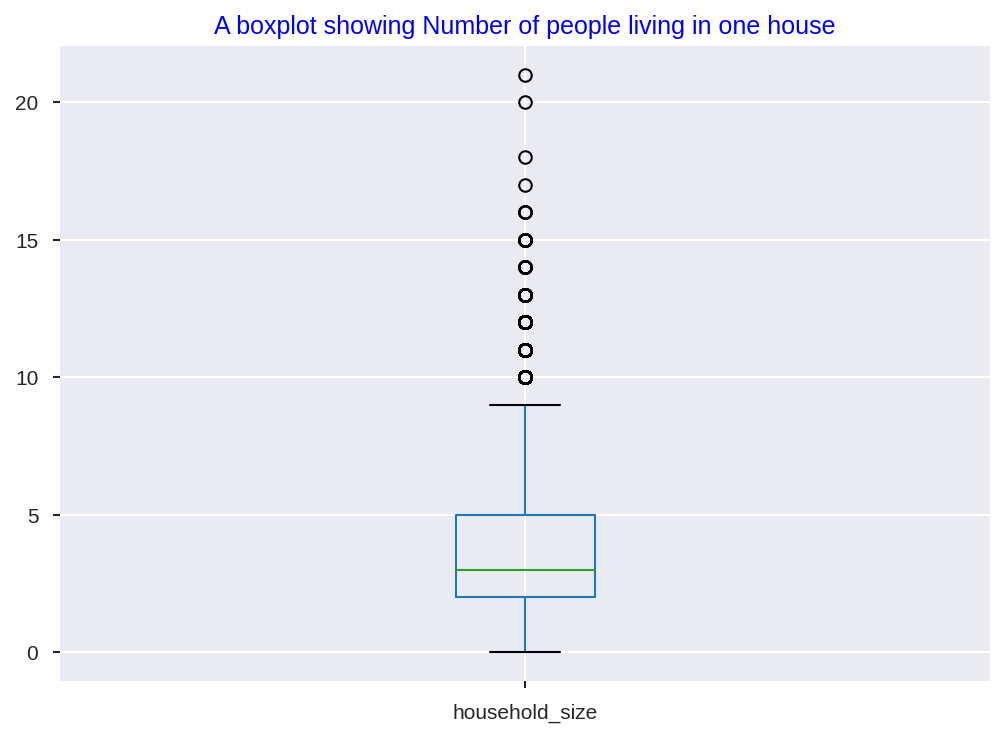

In [ ]:
# checking for outliers on the variable (Household_size) using boxplot

# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart
plt.figure(dpi = 150)
df.boxplot(['household_size'])
plt.title("A boxplot showing Number of people living in one house", color = 'blue')
plt.show()
#No outliers

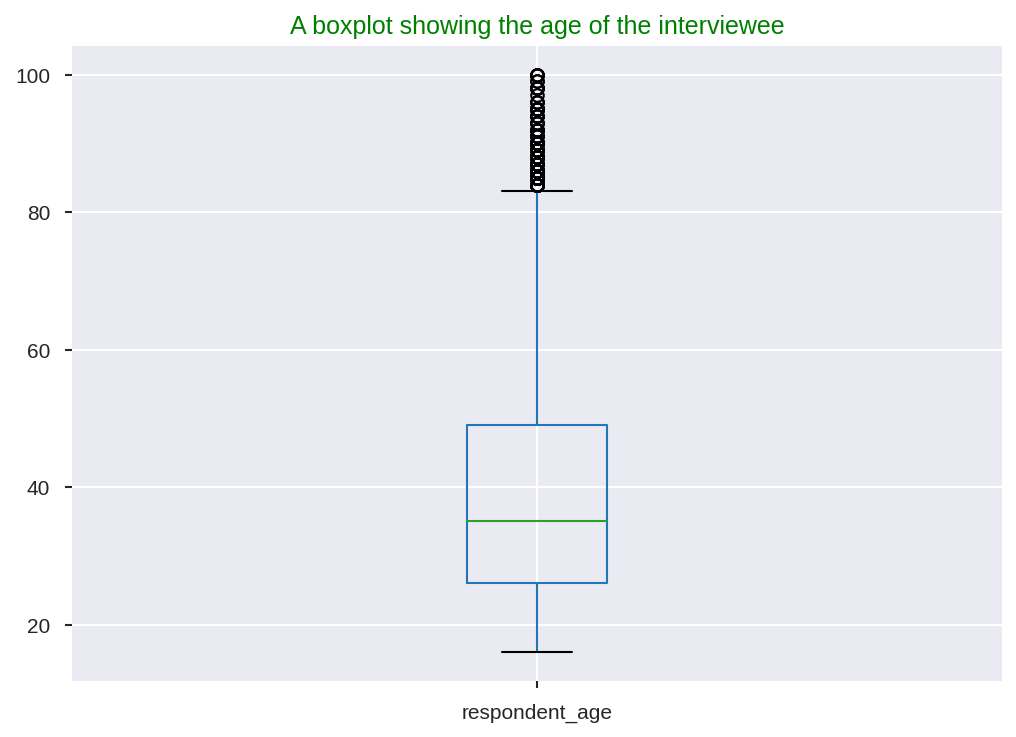

In [ ]:
# checking for outliers on the variable (respondent_age) using boxplot
# Using pandas to create a boxplot
# Giving a title to our chart
# Displaying our chart
plt.figure(dpi = 150)
df.boxplot(['respondent_age'])
plt.title("A boxplot showing the age of the interviewee", color = 'green')
plt.show()

# There are no outliers

Checking for Anomalities

In [ ]:
# Removing the anomalies on the year column

indexnames = df[df['year'] > 2018].index

df.drop(indexnames, inplace = True)

In [ ]:
# checking that there are no anomalies in the year column

df.year.unique()

array([2018, 2016, 2017])

Exploratory Data Analysis

Univariate Visualizations



Using Bar Charts

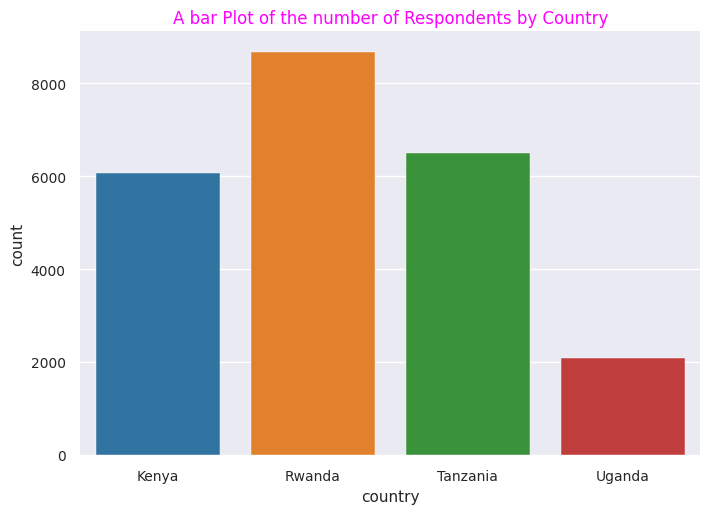

In [ ]:
# Plotting a bar plot of the respondent country 

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.country)
plt.title('A bar Plot of the number of Respondents by Country', color = 'magenta')
plt.show()

In [ ]:
# # Plotting a horizontal bar plot of the respondent highest level of education 

# grouping the data to be plotted

Edu = df.level_of_education.value_counts()
Edu

# accessing the data to plot

# labels
sizes2= Edu.index
sizes2

# values
data2 = Edu.values
data2

# Using matplotlib to create a bar chart
# specifying our chart size
# labeling the y axis
# labeling the x axis
# Giving a title to our chart
# Displaying our chart

plt.figure(figsize = (7,7), dpi = 100)
plt.barh(sizes2, data2, color = 'gold')
plt.ylabel("Highest level of education")
plt.xlabel('Frequency')
plt.title("A Bar chart of respondents highest level of education", color = 'magenta')
plt.show()


AttributeError: ignored

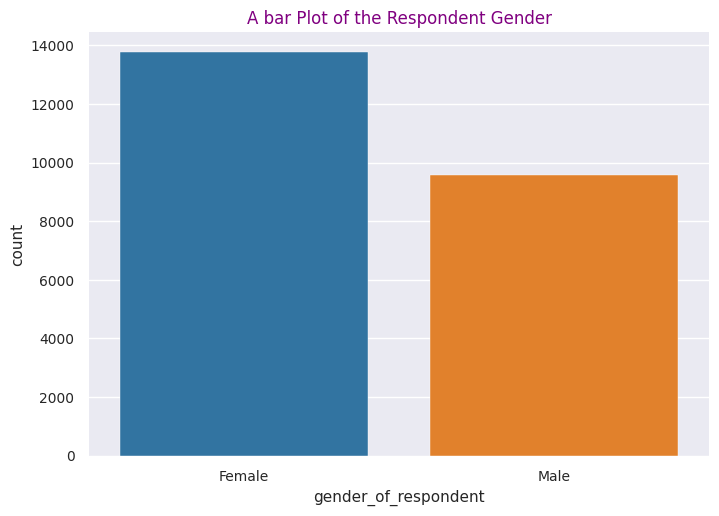

In [ ]:
# Plotting a bar plot of the respondent gender 

# Using seaborn to create a bar chart
# specifying our chart size
# Giving a title to our chart
# Displaying our chart

plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.countplot(df.gender_of_respondent)
plt.title('A bar Plot of the Respondent Gender', color = 'purple')
plt.show()


# The bar chart shows that there were more female respondents than male respondents 

Using Histograms

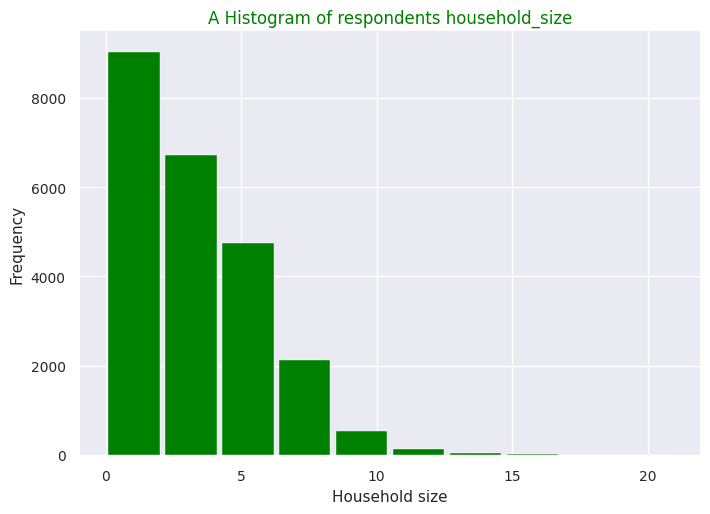

In [ ]:
# Histogram of respondent household_size
	 

# Using matplotlib to create a histogram
# labeling the x axis
# labeling the y axis
# Giving a title to our chart
# Displaying our chart



plt.figure(dpi = 100)
plt.hist(df['household_size'], bins = 10, histtype = 'bar', rwidth = 0.9, color = 'green')
plt.xlabel('Household size')
plt.ylabel('Frequency')
plt.title('A Histogram of respondents household_size', color = 'green')
plt.show()

# the histogram shows us that the household size distribution is skewed to the right
# this is because the tail is long to the right side

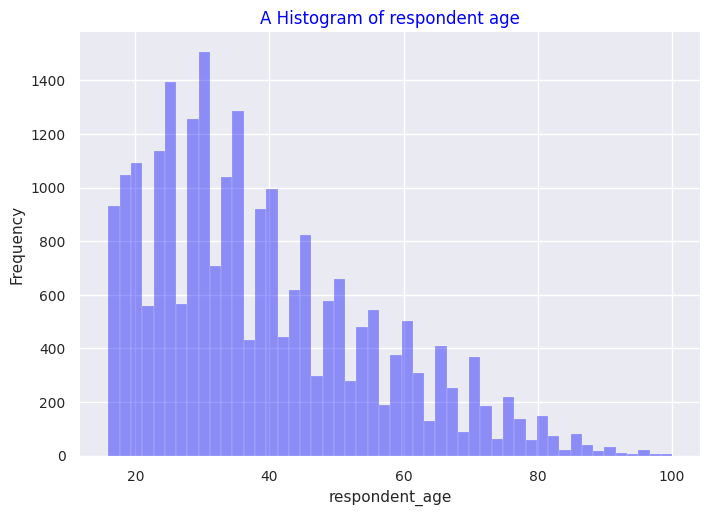

In [ ]:
# Histogram of respondent age
# 

# Using seaborn to create a histogram
# labeling the y axis
# Giving a title to our chart
# Displaying our chart


plt.figure(dpi = 100)
sns.set_style('darkgrid')
sns.distplot(df['respondent_age'], kde = False, color = 'blue')  
plt.title('A Histogram of respondent age', color = 'blue')
plt.ylabel('Frequency')
plt.show()

Using Pie Charts

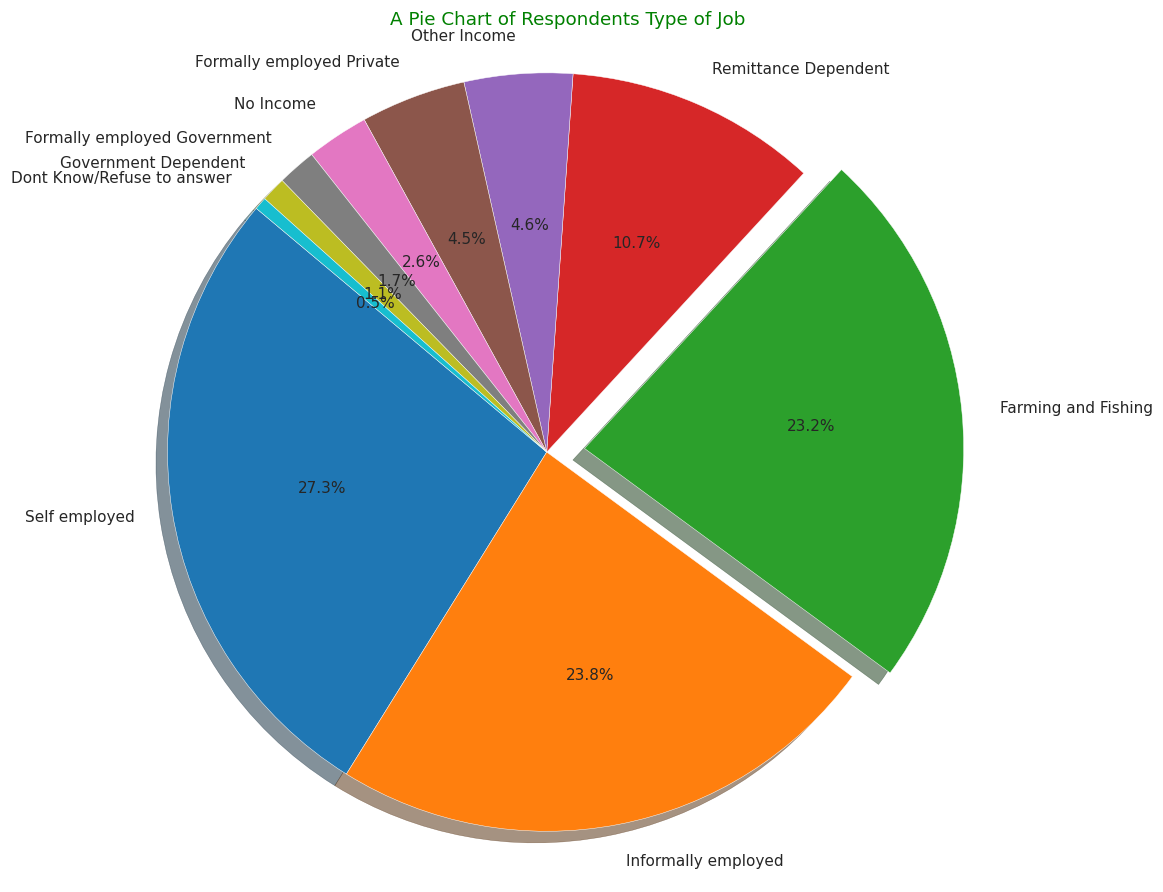

In [ ]:
# A pie chart of the respondents type of job

# grouping the data to be plotted

job = df.type_of_job.value_counts()
job

# accessing the data to plot

# labels
sizes3= job.index
sizes3

# values
data3 = job.values
data3

# plotting the pie chart

plt.figure(figsize = (10,10), dpi = 110)
plt.pie(data3, labels = sizes3, autopct = '%1.1f%%', shadow = True, explode = (0,0,0.1,0,0,0,0,0,0,0), startangle = 140)
plt.axis('equal')
plt.title('A Pie Chart of Respondents Type of Job', color = 'green')
plt.show()


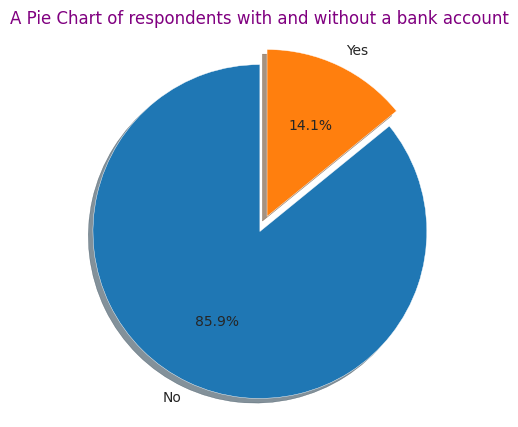

In [ ]:
# A pie chart of the respondents who had/ had no bank account

# grouping the data to be plotted

account = df.has_a_bank_account.value_counts()
account

# accessing the data to plot

# labels
sizes= account.index
sizes

# values
data = account.values
data

# plotting the pie chart

plt.figure(figsize = (5,5), dpi = 100)
plt.pie(data, labels = sizes, autopct = '%1.1f%%', shadow = True, explode = (0.1,0), startangle = 90)
plt.axis('equal')
plt.title('A Pie Chart of respondents with and without a bank account', color = 'purple')
plt.show()

Univariate Analysis

1.Measures of Dispersion

In [ ]:
# Range of the household_size

hMax = df.household_size.max()
print(hMax)

hMin = df.household_size.min()
print(hMin)

hRange = hMax - hMin
hRange

21.0
0.0


21.0

In [ ]:
# Range of the respondent_age

aMax = df.respondent_age.max()
print(aMax)

aMin = df.respondent_age.min()
print(aMin)

aRange = aMax - aMin
aRange

100.0
16.0


84.0

In [ ]:
# Quantiles of the household_size

df["household_size"].quantile([0.25,0.5,0.75])

0.25    2.0
0.50    3.0
0.75    5.0
Name: household_size, dtype: float64

In [ ]:
# Quantiles of the respondent_age

df["respondent_age"].quantile([0.25,0.5,0.75])

0.25    26.0
0.50    35.0
0.75    49.0
Name: respondent_age, dtype: float64

In [ ]:
# Standard Deviation of the household_size

df.household_size.std()


# 2.3 is a low std dev hence the data points are close to the mean (3.7) of the data set

2.2812745975350435

In [ ]:
# Standard Deviation of the respondent_age

df.respondent_age.std()

16.519904564514412

In [ ]:
# Variance of the respondent_age

df.respondent_age.var()

272.90724682066417

In [ ]:
# Variance of the household_size

df.household_size.var()

5.204213789358675

In [ ]:
# Kurtosis of the household_size

df.household_size.kurt()

1.1538357462528523

In [ ]:
# Kurtosis of the respondent_age

df.respondent_age.kurt()

0.09826807013177241

In [ ]:
# Skewness of the respondent_age


df.respondent_age.skew()

0.8406145812311228

In [ ]:
# Skewness of the household_size

df.household_size.skew()

0.9741827150450616

2. Bivariate

Bivariate Visualizations

1.Using Line Charts

In [ ]:
# Selecting a few observations in each column to plot a line graph
# There are too many observations to plot all
# using the iloc to select
# 50 rows  
# previewing the selection

df5 = df.iloc[0:50,-7:-5] 
df5.head()

,household_size,respondent_age
0,3.0,24.0
1,5.0,70.0
2,5.0,26.0
3,5.0,34.0
4,8.0,26.0


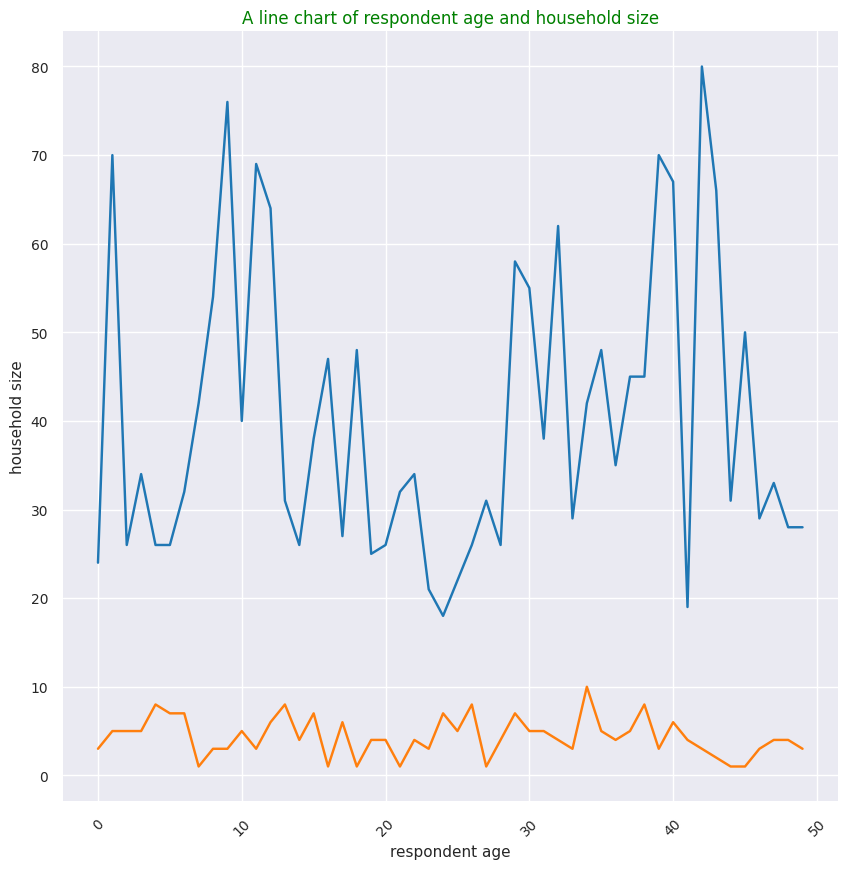

In [ ]:
# Line chart of the respondent age and household size for the first 50 rows only


# figure size specifications
# creating a line chart using matplotlib
# Rotating our x axis ticks
# labelling the title
# labelling the x axis
# labelling the y axis
# Displaying our chart



plt.figure(figsize = (10,10), dpi = 100)
plt.plot(df5[['respondent_age', 'household_size']])
plt.xticks(rotation = 45)
plt.title('A line chart of respondent age and household size', color = 'Green')
plt.xlabel('respondent age')
plt.ylabel('household size')
plt.show()

2. Using Scatter Plots

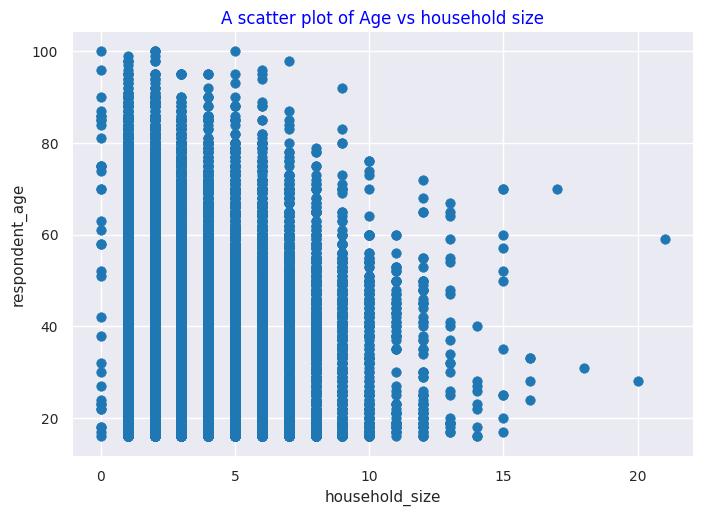

In [ ]:
# Using Matplotlib: Plotting our scatterplot to compare two numerical the variables

# Specifying the chart size

plt.figure(dpi = 100)

# plotting our scatterplot using matplotlib
plt.scatter(df['household_size'], df['respondent_age'])

# Giving the scatterplot a title
plt.title('A scatter plot of Age vs household size', color = 'blue')

# Labelling the x axis
plt.xlabel('household_size')

# Labelling the y axis
plt.ylabel('respondent_age')

# We then display our scatterplot 
plt.show()

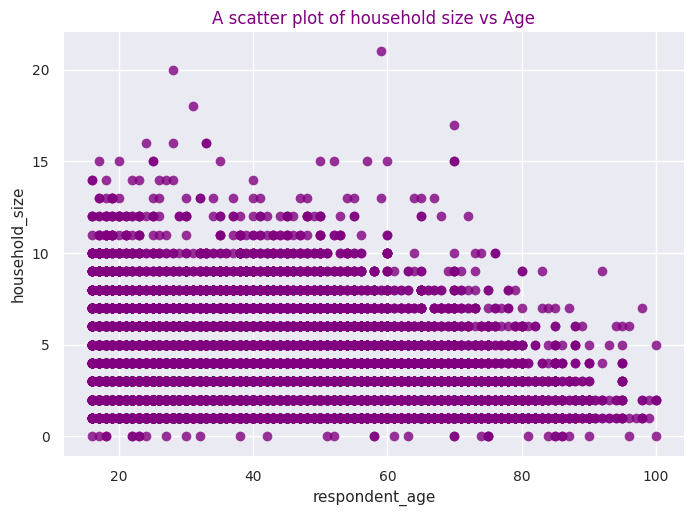

In [ ]:
# Or Using Seaborn: 

# Specifying the dots per inch
# Using the function regplot from Seaborn to create our scatterplot
# creating a title for our scatter plot
# displaying the scatter plot


plt.figure(dpi = 100)
sns.regplot(x= df['respondent_age'], y= df['household_size'], fit_reg = False, color = 'purple')
plt.title("A scatter plot of household size vs Age", color = 'purple')
plt.show()

3. Using Heat Maps

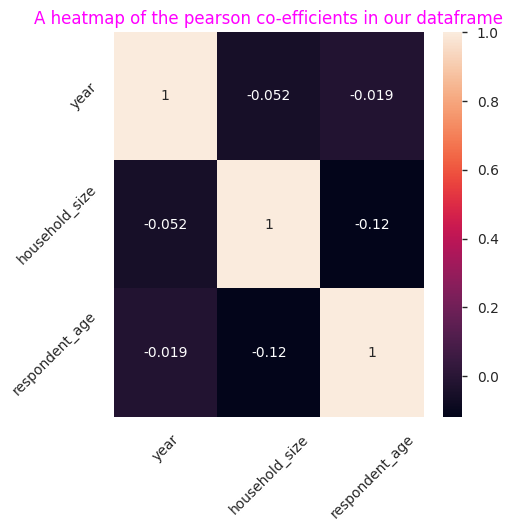

In [ ]:
# Heatmap


# defining our data
# figure size specifications
# using the Seaborn Visualization library
# Rotating our x axis ticks
# Rotating our y axis ticks
# labelling the title
# displaying our chart


x = df.corr()
plt.figure(figsize = (5,5), dpi = 100)
sns.heatmap(x, xticklabels = x.columns, yticklabels=x.columns, annot = True)
plt.title('A heatmap of the pearson co-efficients in our dataframe', color = "magenta")
plt.xticks(rotation = 45)
plt.yticks(rotation = 45)
plt.show()
  

4. Calculating Correlation.

In [ ]:
# Calculating the Pearson Correlation Co-efficient

PCORR = df["respondent_age"].corr(df["household_size"], method="pearson") 
print(PCORR)

# We do not need to define the pearson, it calculates by default

pcorr = df["respondent_age"].corr(df["household_size"]) 
print(pcorr)

-0.11967115234154871
-0.11967115234154871


In [ ]:
# Calculating the pearson coefficient of the entire dataframe

df.corr() 

,year,household_size,respondent_age
year,1.000000,-0.052484,-0.018554
household_size,-0.052484,1.000000,-0.119671
respondent_age,-0.018554,-0.119671,1.000000


3. Multivariate


In [ ]:
# Here we focus on analyzing more than 2 statistical variables at once.

In [ ]:
# To analyse multiple categorical varibales we can turn then into dummies (zeros and ones)

# Pandas has a function which can turn a categorical variable into a series of zeros and ones, 

# This makes them a lot easier to quantify and compare.

In [ ]:
# Converting the categories into dummy variables with ones and zeros

# pd.get_dummies creates a new dataframe which consists of zeros and ones.

dummy = pd.get_dummies(df[['country', 'type_of_location', 'cell_phone_access', 'gender_of_respondent','the_relationship_with_head', 'marital_status', 'level_of_education', 'type_of_job']])
dummy.head()

KeyError: ignored

In [ ]:
# Since we’ve created a whole new dataframe, 
# in order to compare it to our original dataframe,
# we’re going to need to either merge or concatenate them to work with them properly.

# The dummy variables will be on the right side of our dataframe 
# As they are columns, I concatenate them on axis=1.

# concatenating 

dff = pd.concat([df, dummy], axis = 1)
dff.head()

NameError: ignored

Principal Component Analysis

In [ ]:
# Preprocessing steps


# Step 1
# The first preprocessing step is to divide the dataset into;
# a feature set: X, 
# and corresponding label: y.


X = dff.drop(columns = ['country','has_a_bank_account',	'type_of_location',	'cell_phone_access',	'household_size',	'respondent_age',	'gender_of_respondent',	'the_relationship_with_head',	'marital_status',	'level_of_education' ,	'type_of_job'], axis = 1)
y = dff['has_a_bank_account']

NameError: ignored

In [ ]:
X.head(5)

NameError: ignored

In [ ]:
y.head(2)

NameError: ignored

In [ ]:
# Step 2
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

NameError: ignored

In [ ]:
# Step 3
# Normalization
# PCA performs best with a normalized FEATURE SET (X). 
# We will perform standard scaler normalization to normalize our feature set

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

NameError: ignored

In [ ]:
# Step 4
# Applying PCA
# Performing PCA using Python's Scikit-Learn library.

# PCA depends only upon the feature set and not the label data. 
# Therefore, PCA can be considered as an unsupervised machine learning technique.

# Performing PCA using Scikit-Learn is a two-step process:
# Initialize the PCA class by passing the number of components to the constructor.
# Call the fit and then transform methods by passing the feature set to these methods. 

# The transform method returns the specified number of principal components.

# In the code below, we create a PCA object named pca1 
# We did not specify the number of components in the constructor. 
# Hence, all of the features in the feature set will be returned for both the training and test sets.
# 

from sklearn.decomposition import PCA

pca = PCA(0.95)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

NameError: ignored

In [ ]:
# Step 5
# Explained Variance Ratio
# The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components. 
# The line of code below will output the "explained variance ratio".
# 


explained_variance = pca.explained_variance_ratio_
explained_variance

AttributeError: ignored

In [ ]:
# step 6:
# Using the 24 Principal Components to train our algorithm
 
from sklearn.decomposition import PCA

pca = PCA(n_components=24)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

NameError: ignored

In [ ]:
# step 7
# Training and and Making Predictions 
# Here we use random forest classification for making predictions

from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(max_depth = 2, random_state = 0)
classifier.fit(X_train, y_train)

# predicting the Test set results

y_pred = classifier.predict(X_test)

In [ ]:
# step 8
# Performance evaluation

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy' , accuracy_score(y_test, y_pred))